<h1>Agglomerative Clustering</h1>

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [11]:
#loading train and test data
import pickle
with open('train_bag.pickle', 'rb') as f:
    train_bag=pickle.load(f)
with open('test_bag.pickle','rb') as f:
    test_bag=pickle.load(f)

In [12]:
#loading y_train and y_test dataset
with open('y_train.pickle', 'rb') as f:
    y_bow=pickle.load(f)
with open('y_test.pickle','rb') as f:
    y_test=pickle.load(f)

In [13]:
#normalising the datasetsc
from sklearn.preprocessing import normalize
x_bow=normalize(train_bag,axis=0)
test_bow=normalize(test_bag,axis=0)

<h3>Applying Agglomerative Clustering on BOW</h3>

In [64]:
from sklearn.cluster import AgglomerativeClustering
clf=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clf=clf.fit(x_bow.todense())

<h3>Wordclouds of clusters obtained after applying Agglomerative Clustering on Bag of words</h3>

In [65]:
cluster_labels=clf.labels_

In [70]:
#feature importance
with open('bow_features.pickle','rb') as f:
    bow_features=pickle.load(f)

In [72]:
cluster_0=[]
cluster_1=[]
cluster_2=[]
for i in range(len(cluster_labels)):
    if cluster_labels[i]==0:
        cluster_0.append(bow_features[i])
    elif cluster_labels[i]==1:
        cluster_1.append(bow_features[i])
    else:
        cluster_2.append(bow_features[i])
    

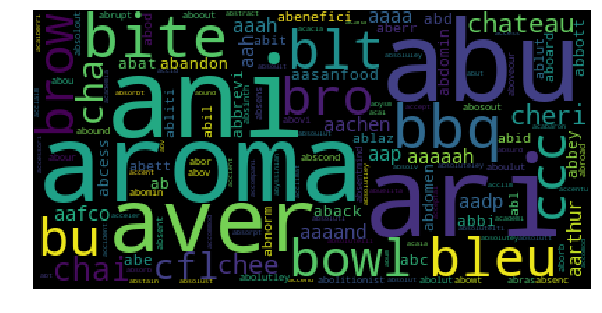

In [74]:
unique_string=(" ").join(cluster_0)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

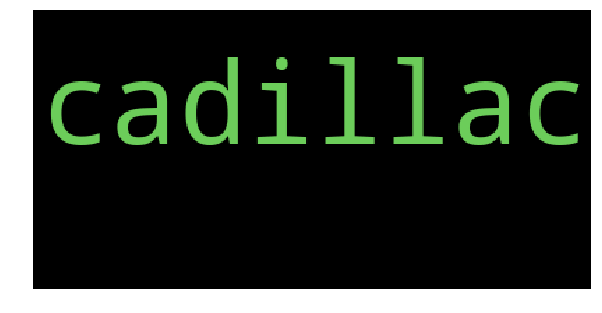

In [75]:
unique_string=(" ").join(cluster_1)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

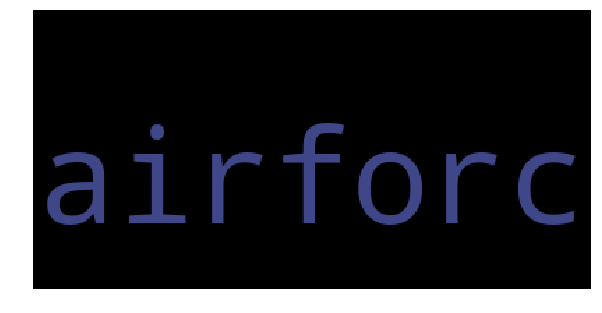

In [76]:
unique_string=(" ").join(cluster_2)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<b>Observation:</b></br>
Cluster 1 and cluster 2 contains one word each and may be the outlier data point

<h3>Applying Agglomerative Clustering on AVG W2V</h3>

In [2]:
import pickle
with open('train_avgw2v.pickle', 'rb') as f:
    x_avgw2v=pickle.load(f)
with open('test_avgw2v.pickle','rb') as f:
    test_avgw2v=pickle.load(f)

In [3]:
#loading y_train and y_test dataset
with open('y_train_avgw2v.pickle', 'rb') as f:
    y_avgw2v=pickle.load(f)
with open('y_test_avgw2v.pickle','rb') as f:
    y_test_avgw2v=pickle.load(f)

In [10]:
from sklearn.preprocessing import normalize
x_avgw2v=normalize(x_avgw2v,axis=0)
test_avgw2v=normalize(test_avgw2v,axis=0)

In [9]:
with open('avg_w2v_features.pickle','rb') as f:
    avg_w2v_features=pickle.load(f)

In [82]:
from sklearn.cluster import AgglomerativeClustering
clf=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clf=clf.fit(x_avgw2v)

In [83]:
cluster_labels=clf.labels_

<h3>Wordclouds of clusters obtained after applying Agglomerative Clustering on AVG W2V</h3>

In [84]:
cluster_0=[]
cluster_1=[]
cluster_2=[]
for i in range(len(cluster_labels)):
    if cluster_labels[i]==0:
        cluster_0.append(avg_w2v_features[i])
    elif cluster_labels[i]==1:
        cluster_1.append(avg_w2v_features[i])
    else:
        cluster_2.append(avg_w2v_features[i])
    

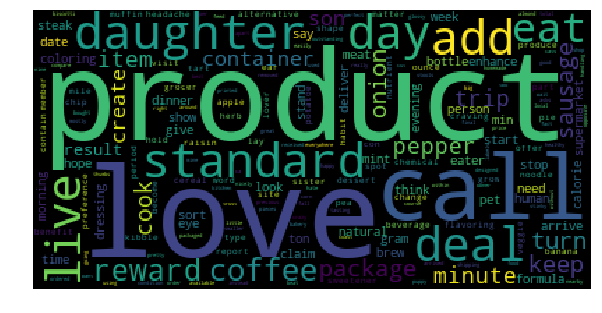

In [85]:
unique_string=(" ").join(cluster_0)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

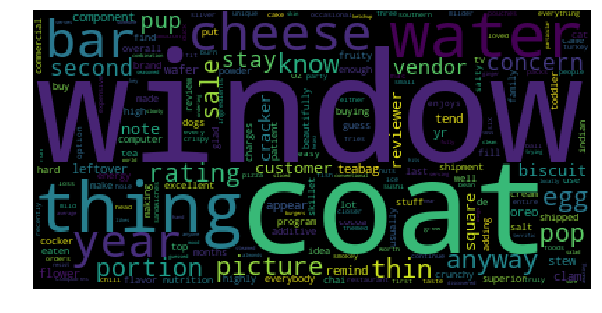

In [87]:
unique_string=(" ").join(cluster_1)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

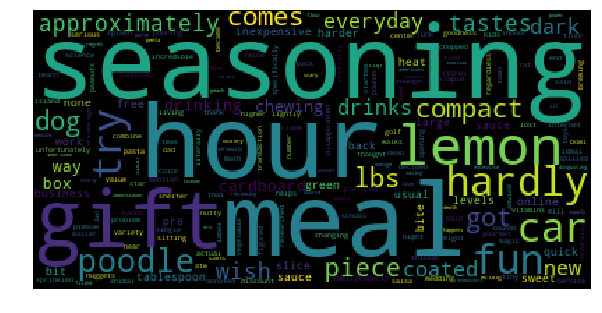

In [88]:
unique_string=(" ").join(cluster_2)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<h2>Applying Agglomerative Clustering on TFIDF W2V</h2>

In [18]:
import pickle
with open('x_train_tfidf_w2v.pickle', 'rb') as f:
    train_tfidf_w2v=pickle.load(f)
with open('x_test_tfidf_w2v.pickle','rb') as f:
    test_tfidf_w2v=pickle.load(f)

In [19]:
import pickle
with open('y_train_tfidf_w2v.pickle', 'rb') as f:
    y_train=pickle.load(f)
with open('y_test_tfidf_w2v.pickle','rb') as f:
    y_test=pickle.load(f)

In [20]:
with open('features.pickle','rb') as f:
    features=pickle.load(f)

In [21]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
x_train_tfidf_w2v = normalize(train_tfidf_w2v, axis=0)
x_test_tfidf_w2v = normalize(test_tfidf_w2v, axis=0)

In [95]:
#Applying AgglomerativeClustering on n_clusters=3
from sklearn.cluster import AgglomerativeClustering
clf=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clf=clf.fit(x_train_tfidf_w2v)

In [96]:
#finding the labels for the points
cluster_labels=clf.labels_

<h3>Wordclouds of clusters obtained after applying Agglomerative Clustering on TFIDF W2V </h3>

In [98]:
cluster_0=[]
cluster_1=[]
cluster_2=[]
for i in range(len(cluster_labels)):
    if cluster_labels[i]==0:
        cluster_0.append(features[i])
    elif cluster_labels[i]==1:
        cluster_1.append(features[i])
    else:
        cluster_2.append(features[i])
    

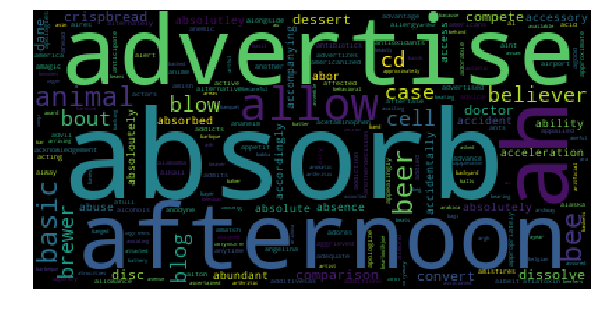

In [99]:
unique_string=(" ").join(cluster_0)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

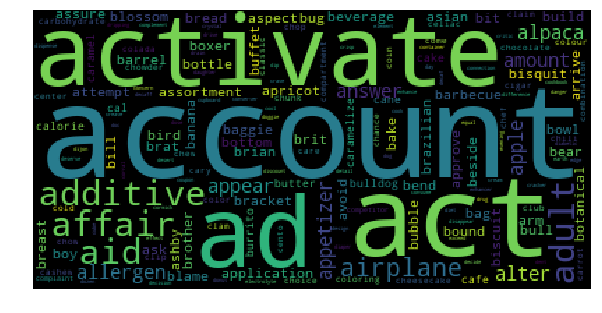

In [100]:
unique_string=(" ").join(cluster_1)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

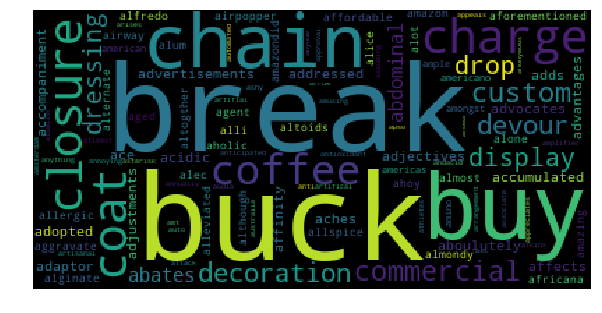

In [101]:
#cluster_2 for outliers cluster_labels give -1 for outliers
unique_string=(" ").join(cluster_2)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<h1>DBSCAN Clustering</h1>

<h3>Applying DBSCAN on AVG W2V</h3>

In [107]:
#finding the nearest neighbors for the data points
from sklearn.neighbors import NearestNeighbors
#X=np.array(x_avgw2v)
nbrs=NearestNeighbors(n_neighbors=5,algorithm='ball_tree').fit(x_avgw2v) 
distances,indices=nbrs.kneighbors(x_avgw2v)

In [108]:
#taking the distance from the datapoint to the fifth nearest neighbour
import numpy as np
a=np.array(distances)
b=a[:,np.array([False,False,False,False,True])]

In [113]:
#converting the array to list and sort them in ascending order
m=np.array(b).tolist()
m.sort()
point_index=list(range(3490))
type(point_index)

list

Text(0.5,1,'DBSCAN Plot')

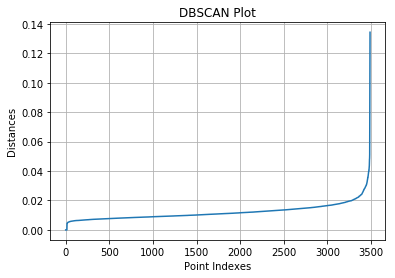

In [114]:
#ploting the graph against distances and data points
plt.plot(point_index,m)
plt.xlabel('Point Indexes')
plt.ylabel('Distances')
plt.grid()
plt.title('DBSCAN Plot')

In [11]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.02, min_samples=2).fit(x_avgw2v)

In [12]:
cluster_labels=clustering.labels_

In [13]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<h3>Wordclouds of clusters obtained after applying Agglomerative Clustering on w2vec</h3>

In [14]:
cluster_0=[]
cluster_1=[]
cluster_2=[] #cluster_2 is for outliers cluster_labels 
for i in range(len(cluster_labels)):
    if cluster_labels[i]==0:
        cluster_0.append(avg_w2v_features[i])
    elif cluster_labels[i]==1:
        cluster_1.append(avg_w2v_features[i])
    else:
        cluster_2.append(avg_w2v_features[i])
#Noisy samples are given the label -1

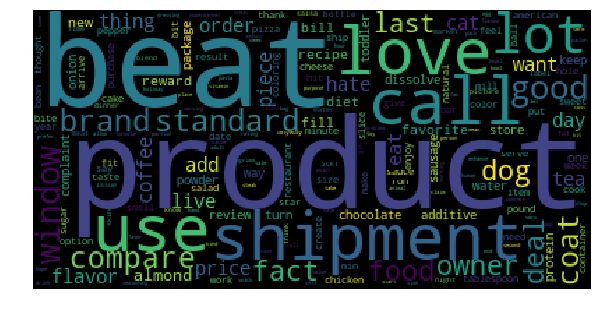

In [15]:
unique_string=(" ").join(cluster_0)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<b>Observation:</b></br>
Seems like cluster contains positive label words

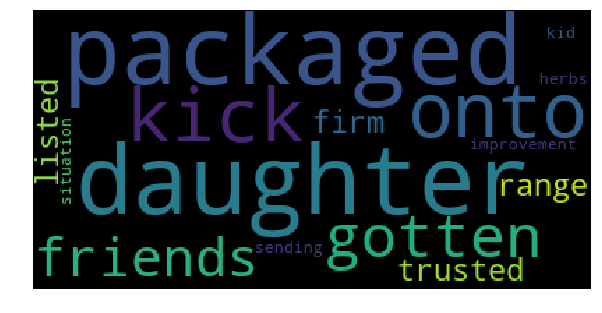

In [16]:
unique_string=(" ").join(cluster_1)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

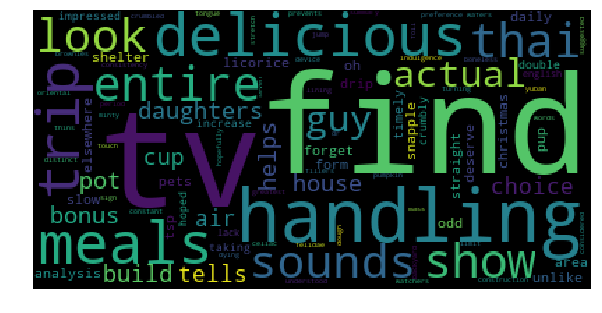

In [17]:
#cluster_2 for outliers cluster_labels give -1 for outliers
unique_string=(" ").join(cluster_2)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Seems like DBSCAN is better than agglomerative clustering as words in the DBScan cluster are closly related than agglomerative clustering

<h1>DBSCAN Clustering</h1>

<h2>Applying DBSCAN on TFIDF W2V</h2>

In [22]:
#finding the nearest neighbors for the data points
from sklearn.neighbors import NearestNeighbors
#X=np.array(x_avgw2v)
nbrs=NearestNeighbors(n_neighbors=5,algorithm='ball_tree').fit(x_avgw2v) 
distances,indices=nbrs.kneighbors(x_train_tfidf_w2v)

In [23]:
#taking the distance from the datapoint to the fifth nearest neighbour
import numpy as np
a=np.array(distances)
b=a[:,np.array([False,False,False,False,True])]

In [27]:
#converting the array to list and sort them in ascending order
m=np.array(b).tolist()
m.sort()
#data points of 5000 as we took 3k reviews
point_index=list(range(3988))

Text(0.5,1,'DBSCAN Plot')

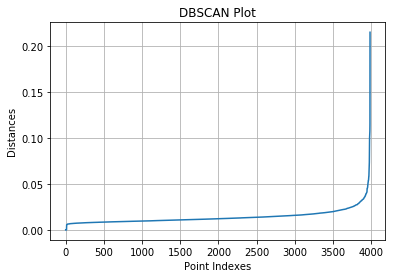

In [30]:
#ploting the graph against distances and data points
plt.plot(point_index,m)
plt.xlabel('Point Indexes')
plt.ylabel('Distances')
plt.grid()
plt.title('DBSCAN Plot')

In [31]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.02, min_samples=2).fit(x_train_tfidf_w2v)

In [32]:
cluster_labels=clustering.labels_

<h3>Wordclouds of clusters obtained after applying Agglomerative Clustering on TFIDF W2vec</h3>

In [38]:
cluster_0=[]
cluster_1=[]
cluster_2=[] #cluster_2 is for outliers cluster_labels 
for i in range(len(cluster_labels)):
    if cluster_labels[i]==0:
        cluster_0.append(features[i])
    elif cluster_labels[i]==1:
        cluster_1.append(features[i])
    elif cluster_labels[i]==-1:
        cluster_2.append(features[i])
#Noisy samples are given the label -1

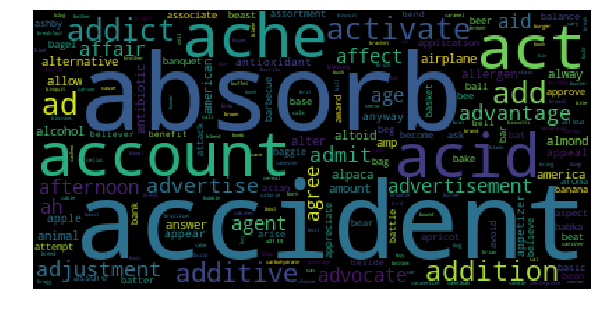

In [39]:
unique_string=(" ").join(cluster_0)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

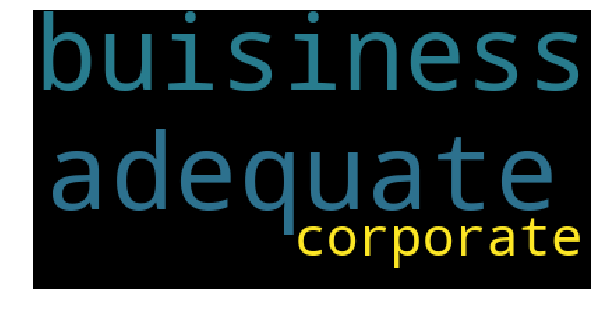

In [40]:
unique_string=(" ").join(cluster_1)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<b>Observation:</b></br>
We can observe that the words business,corporate and adequate are closely related. 

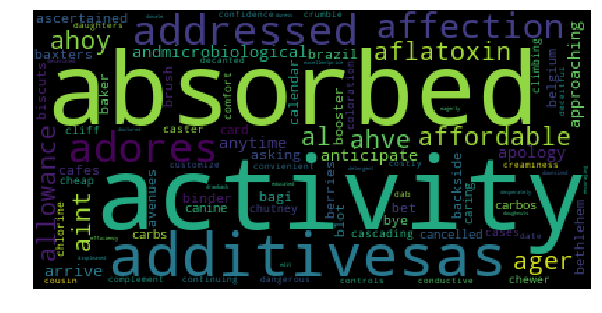

In [41]:
#cluster_2 for is outliers cluster_labels 
unique_string=(" ").join(cluster_2)
wordcloud = WordCloud().generate(unique_string)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<b>Observation:</b></br>
The above cluster represents the outlier points